## **Exploratory Data Analysis and Time-Series Forecasting- Delhi Weather Data**
**Problem Statement**: A historical analysis of the evolution of weather conditions in Delhi, owing
to the changes occurring due to industrialization, increase of vehicles and climate change, along
with a Time-Series model to predict future temperatures.

Group Members: 
1.	Wyshnavi Ghag - 19070122200 CS-C
2.	Avinaash Ganesh - 19070122039 CS-A
3.	Pratyush Sinha - 19070122130 CS-B
4.	Akshay Mategaonkar - 19070122105 CS-B


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**LOADING AND UNDERSTANDING THE DATA**


In [ ]:
url = 'https://raw.githubusercontent.com/avinxxsh/OSTDataset/main/testset.csv' 
df = pd.read_csv(url) # loading dataset into the variable df
df.head(5) # displaying first 5 entries from the dataset

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [ ]:
df.tail(5) #displaying last 5 entries from the dataset

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
100985,20170424-06:00,Haze,17.0,0,0,NaN,25.0,NaN,1005.0,0,0,34.0,0,0,4.0,320.0,NW,NaN,NaN,11.1
100986,20170424-09:00,Haze,14.0,0,0,NaN,16.0,NaN,1003.0,0,0,38.0,0,0,4.0,320.0,NW,NaN,NaN,22.2
100987,20170424-12:00,Haze,12.0,0,0,NaN,14.0,NaN,1002.0,0,0,36.0,0,0,4.0,270.0,West,NaN,NaN,18.5
100988,20170424-15:00,Haze,15.0,0,0,NaN,27.0,NaN,1004.0,0,0,32.0,0,0,2.0,320.0,NW,NaN,NaN,3.7
100989,20170424-18:00,Haze,15.0,0,0,NaN,30.0,NaN,1005.0,0,0,30.0,0,0,2.0,320.0,NW,NaN,NaN,3.7


In [ ]:
df.shape #(rows, columns) in the dataset

(100990, 20)

In [ ]:
df.describe() # display basic statistics of all columns in dataset

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

In [ ]:
df[' _conds'].value_counts()

Haze                             47602
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Fog                           64
Light Thunderstorm                  64
Heavy Rain               

In [ ]:
df.isnull().sum()

datetime_utc         0
 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64

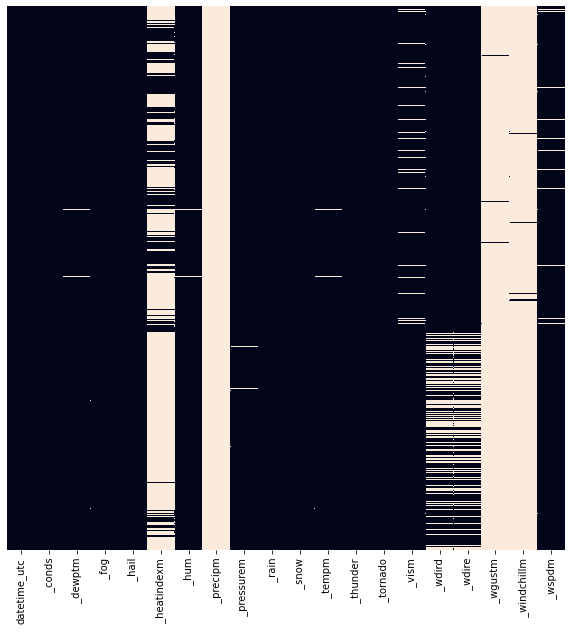

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

**FEATURE ENGINEERING AND CLEANING THE DATA**

In [ ]:
import datetime as dt
from datetime import timedelta

In [ ]:
df['formatted_date'] = pd.to_datetime(df['datetime_utc'])

In [ ]:
df = df.drop('datetime_utc', 1) # dropping the datetime column since we have a new formatted datetime column

In [ ]:
first_column = df.pop('formatted_date')
df.insert(0, 'formatted_date', first_column) # moving the formatted_date column to the beginning of the dataset(index = 0)
print(df.head(2)) 
print(df.tail(2))

       formatted_date  _conds   _dewptm  ...   _wgustm   _windchillm   _wspdm
0 1996-11-01 11:00:00   Smoke       9.0  ...       NaN           NaN      7.4
1 1996-11-01 12:00:00   Smoke      10.0  ...       NaN           NaN      NaN

[2 rows x 20 columns]
            formatted_date  _conds   _dewptm  ...   _wgustm   _windchillm   _wspdm
100988 2017-04-24 15:00:00    Haze      15.0  ...       NaN           NaN      3.7
100989 2017-04-24 18:00:00    Haze      15.0  ...       NaN           NaN      3.7

[2 rows x 20 columns]


In [ ]:
df.columns

Index(['formatted_date', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [ ]:
df.isnull().sum()

formatted_date         0
 _conds               72
 _dewptm             621
 _fog                  0
 _hail                 0
 _heatindexm       71835
 _hum                757
 _precipm         100990
 _pressurem          232
 _rain                 0
 _snow                 0
 _tempm              673
 _thunder              0
 _tornado              0
 _vism              4428
 _wdird            14755
 _wdire            14755
 _wgustm           99918
 _windchillm      100411
 _wspdm             2358
dtype: int64

**ANALYSIS USING DATA VISUALIZATION**

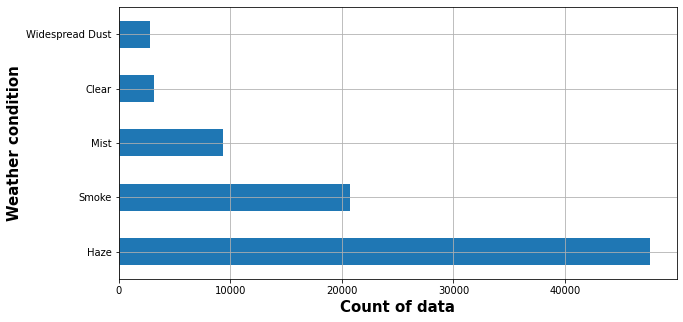

In [ ]:
#Bar Graph showing the Top 5 Weather Conditions that have been recorded
plt.figure(figsize=(10, 5))
df[' _conds'].value_counts().sort_values(ascending=False)[:5].plot(kind='barh')
plt.xlabel("Count of data",fontsize="15",fontweight="bold")
plt.ylabel("Weather condition",fontsize="15",fontweight="bold")
plt.grid(True)
plt.show()

#This shows that 'Haze' is the most commonly occuring Weather Condition in Delhi. Alarmingly, the Top 5 Conditions include 'Widespread Dust', 'Mist' and 'Smoke' as well.

#"Haze is mostly caused by air pollution from human activity including industry, power generation, transportation, and agriculture." This is what the National Park Service suggests.

In [ ]:
df=df[['formatted_date', ' _tempm', ' _hum']]
df3= df.dropna()
df3.isnull().sum()
#No more null values 

formatted_date    0
 _tempm           0
 _hum             0
dtype: int64

In [ ]:
#Extracting datetime and temperature from data
data=df3[['formatted_date', ' _tempm']]
data.columns=['date', 'temp'] #Altering names of columns
data.head()

,date,temp
0,1996-11-01 11:00:00,30.0
1,1996-11-01 12:00:00,28.0
2,1996-11-01 13:00:00,24.0
3,1996-11-01 14:00:00,24.0
4,1996-11-01 16:00:00,23.0


In [ ]:
#Making date column the index
data=data.set_index('date')
data.head()

,temp
date,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


[]

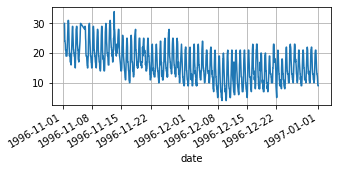

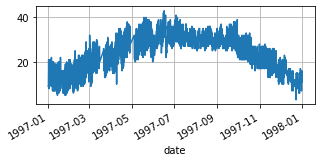

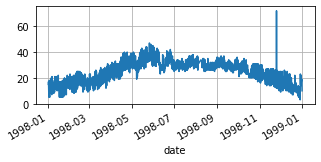

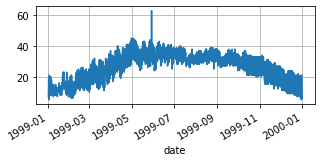

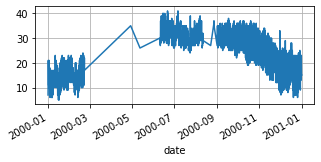

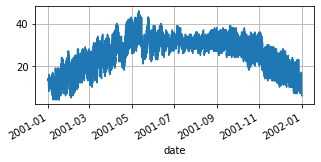

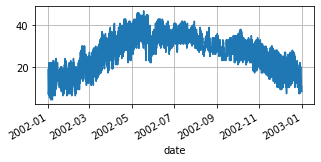

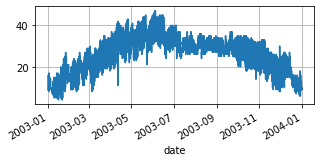

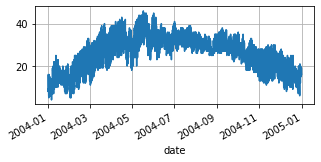

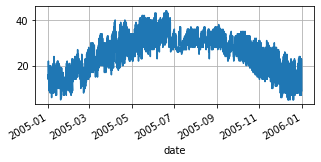

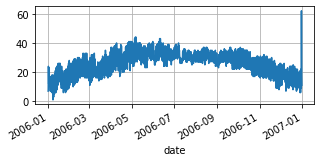

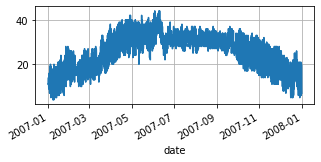

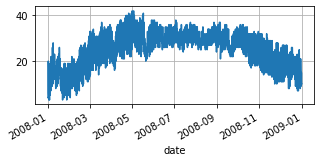

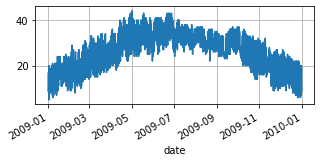

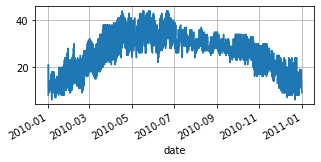

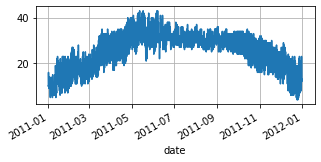

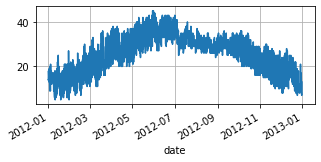

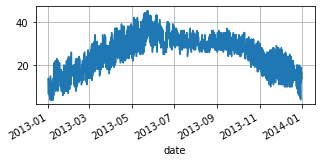

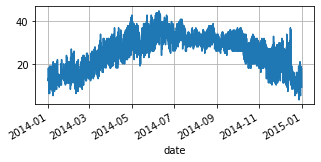

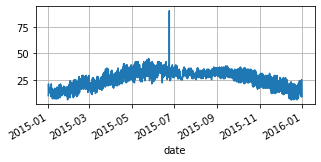

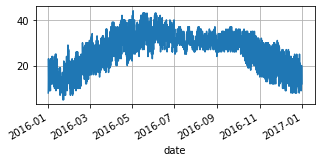

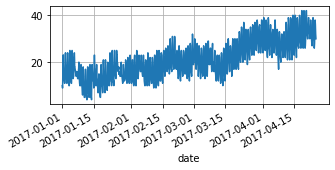

In [ ]:
#It can be helpful to compare line plots for the same interval, such as from day-to-day, month-to-month, and year-to-year.
#We can group data by year and create a line plot for each year for direct comparison.

data.groupby(data.index.year).plot(subplots=True, legend=False, figsize=(5, 2), grid=True)
plt.plot()


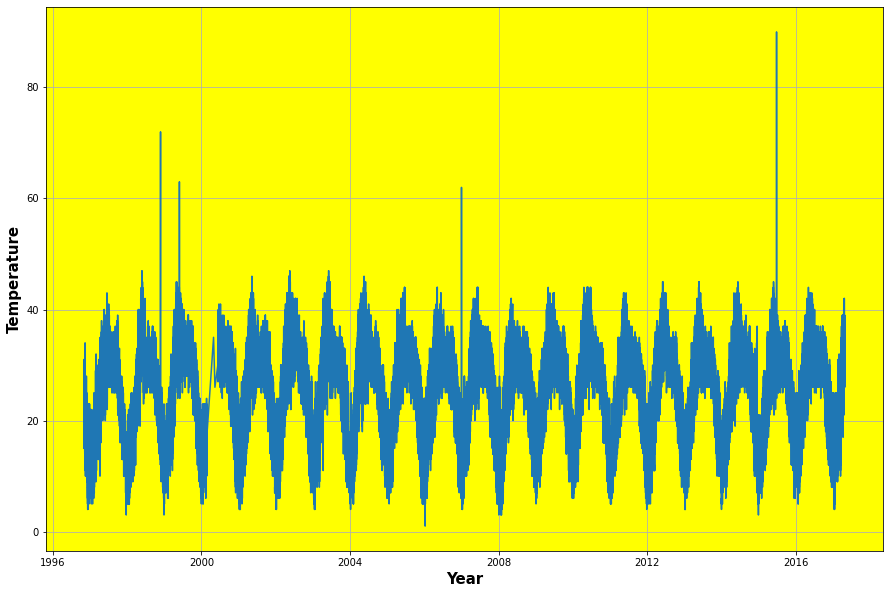

In [ ]:
#Plotting Temp vs Year plot

fig=plt.figure(figsize=(15,10))
ax = plt.axes()
ax.set_facecolor("yellow")
plt.xlabel("Year",fontsize="15",fontweight="bold")
plt.ylabel("Temperature",fontsize="15",fontweight="bold")
plt.grid(True)
plt.plot(data)
plt.show()

In [ ]:
#Obtaining average temperatures for each year, month, day and hour

daily_mean=data.groupby(data.index.day).mean()
monthly_mean=data.groupby(data.index.month).mean()
yearly_mean=data.groupby(data.index.year).mean()
hourly_mean=data.groupby(data.index.hour).mean()

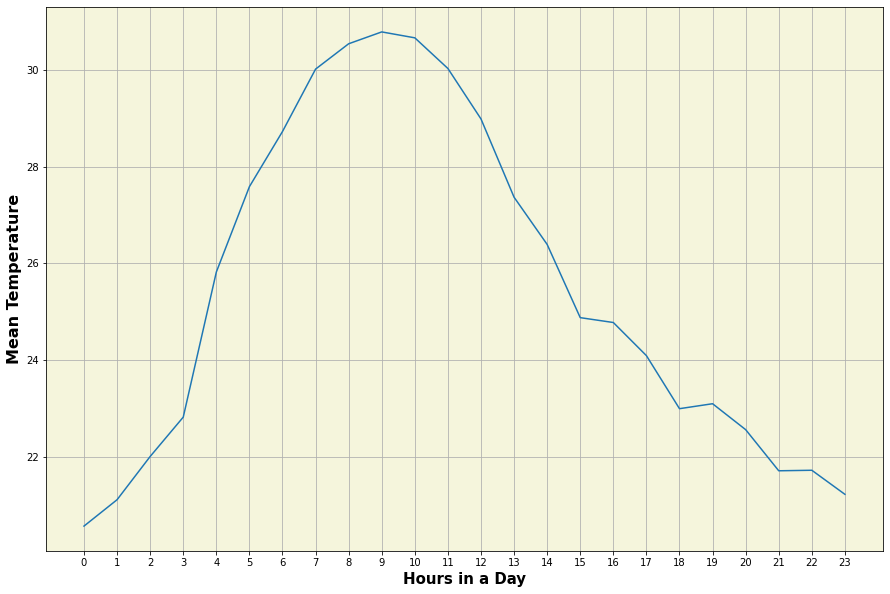

In [ ]:
#Plotting Mean Temperature vs Hours in a Day

fig=plt.figure(figsize=(15, 10))
ax=plt.axes()
ax.set_facecolor("#F5F5DC")
plt.plot(hourly_mean)
plt.grid(True)
plt.xticks(range(0,24))
plt.xlabel("Hours in a Day",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=16,fontweight="bold")
plt.show()

#We notice that in general, the mean temperature is the higest at around noon time (10 am - 12 noon)

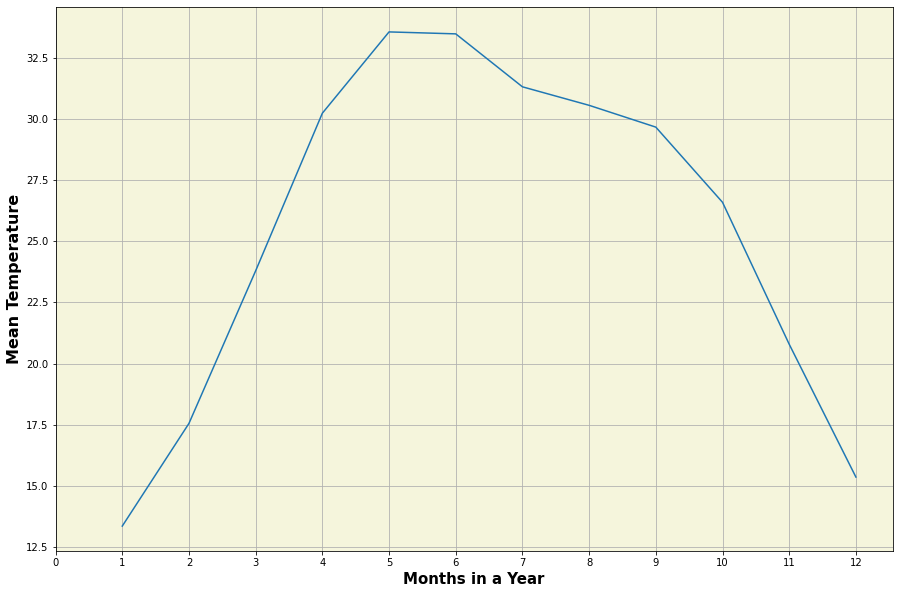

In [ ]:
#Plotting Mean Temperature vs Months in a Year

fig=plt.figure(figsize=(15, 10))
ax=plt.axes()
ax.set_facecolor("#F5F5DC")
plt.plot(monthly_mean)
plt.grid(True)
plt.xticks(range(0,13))
plt.xlabel("Months in a Year",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=16,fontweight="bold")
plt.show()

#We notice that during Summer season (March-July), the mean temperature is the highest

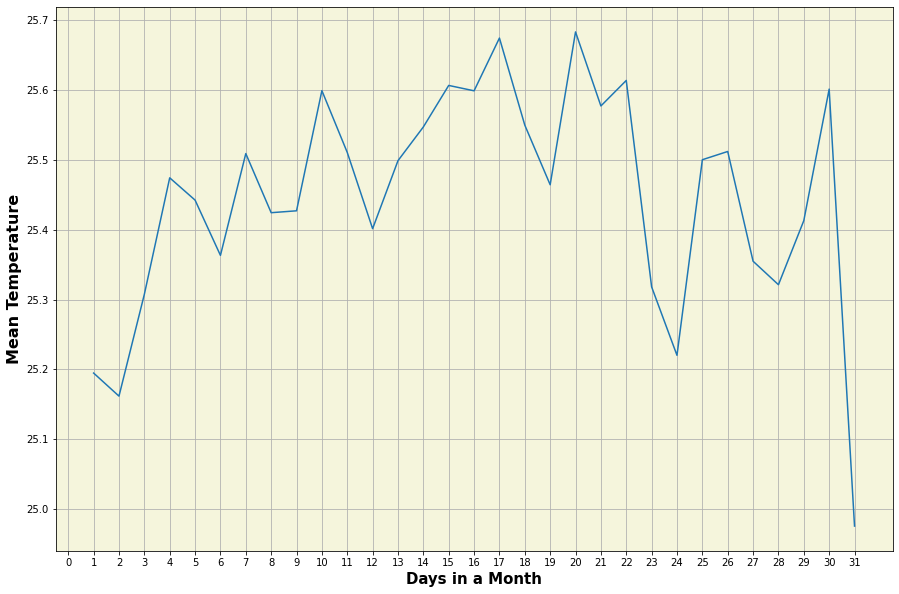

In [ ]:
#Plotting Mean Temperature vs Days in a Month

fig=plt.figure(figsize=(15, 10))
ax=plt.axes()
ax.set_facecolor("#F5F5DC")
plt.plot(daily_mean)
plt.grid(True)
plt.xticks(range(0,32))
plt.xlabel("Days in a Month",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=16,fontweight="bold")
plt.show()

#We don't notice a recognizable pattern of the mean temperature for the days of a month. This can be because during different months, temperatures vary for different days in different months

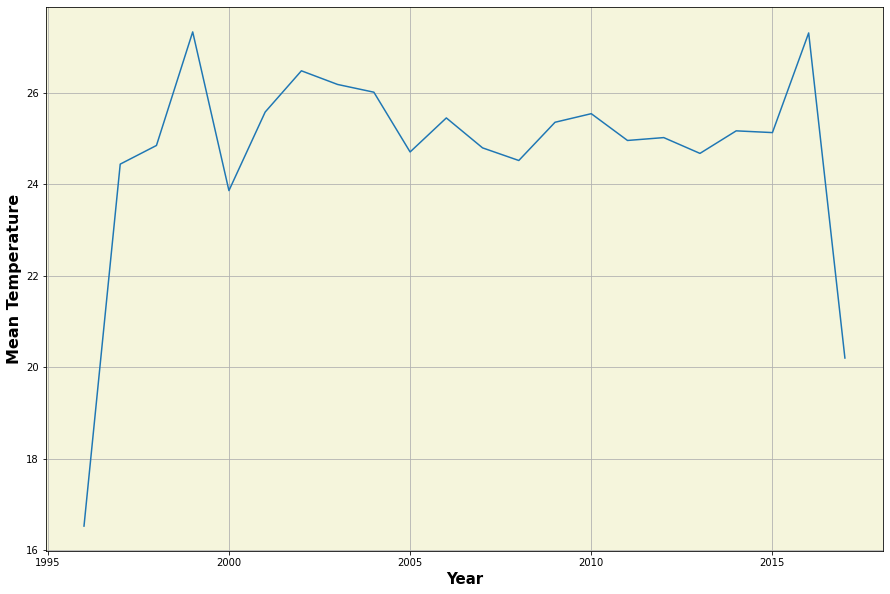

In [ ]:
#Plotting Mean Temperature vs Year

fig=plt.figure(figsize=(15, 10))
ax=plt.axes()
ax.set_facecolor("#F5F5DC")
plt.plot(yearly_mean)
plt.grid(True)
plt.xlabel("Year",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=16,fontweight="bold")
plt.show()

#We notice that there's been a sharp increase in Delhi's average temperature from 1996, and has stabilized from around 2005

In [ ]:
#Extracting datetime, temprature and humidity

df4=df3[['formatted_date', ' _hum',' _tempm']]
df4.columns=['date', 'humidity', 'temp']
df4.head()

,date,humidity,temp
0,1996-11-01 11:00:00,27.0,30.0
1,1996-11-01 12:00:00,32.0,28.0
2,1996-11-01 13:00:00,44.0,24.0
3,1996-11-01 14:00:00,41.0,24.0
4,1996-11-01 16:00:00,47.0,23.0


In [ ]:
#Making date column the index
df4=df4.set_index('date')
df4.head()

,humidity,temp
date,,
1996-11-01 11:00:00,27.0,30.0
1996-11-01 12:00:00,32.0,28.0
1996-11-01 13:00:00,44.0,24.0
1996-11-01 14:00:00,41.0,24.0
1996-11-01 16:00:00,47.0,23.0


[]

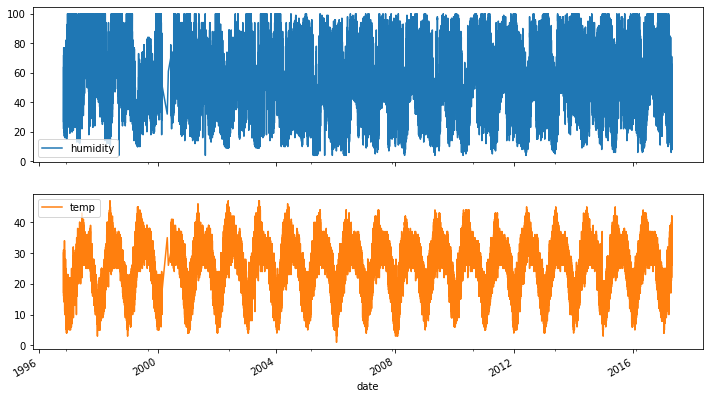

In [ ]:
df4 = df4[df4['temp'] < 50]
df4 = df4[df4['humidity'] <= 100]

#Removing temperature < 50 C as they're heavy outliers and humidity < 100 % as that doesn't make sense

df4.plot(subplots=True, figsize=(12,7))
plt.legend()
plt.plot()

#It seems overplotted, let's plot for only two years 2015 and 2016, it will give us the clear picture of seasonality and trend.

[]

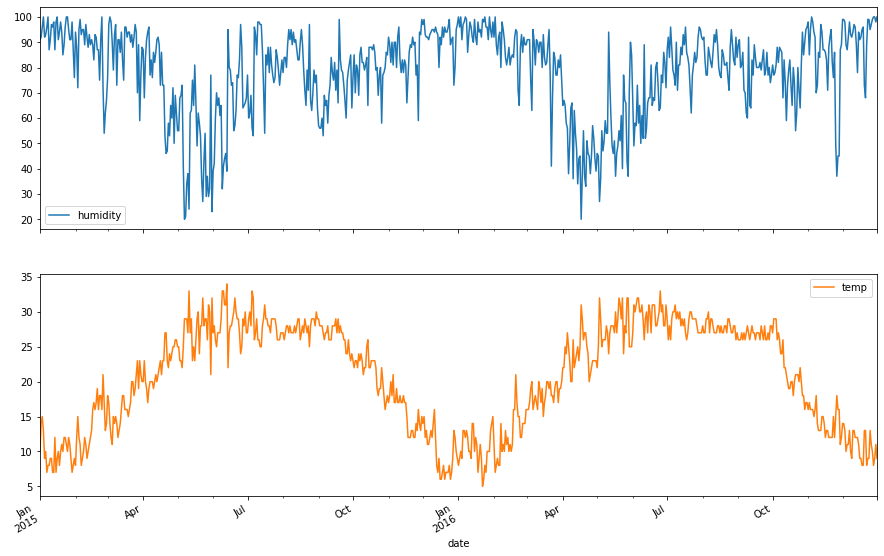

In [ ]:
df4['2015':'2016'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(15, 10))
plt.plot()

#So it shows that mid two quarter are hotter than first and last, humidity varies accordingly
#Relative humidity changes when temperatures change. Because warm air can hold more water vapor than
#cool air, relative humidity falls when the temperature rises if no moisture is added to the air.

In [ ]:
df4.drop(columns='humidity', axis=1, inplace=True)
df4 = df4['2000':'2017'].resample('M').mean().fillna(method='pad')

Decomposing monthly data from 2000-2017, we observe two things:

1. It shows clear seasonality in every 12 months.
2. While the monthly temperature decreases, it also increases later, and hence no trend is observed 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


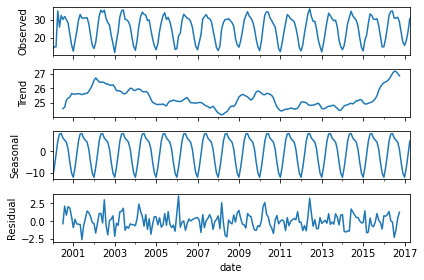

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result=seasonal_decompose(df4)
result.plot()
plt.show()

**Components of Time Series Data:**

1. **Trend**: A gradual increase or decrease increase in the of observations(mean & variance) over a long period of time.

2. **Seasonality**: Repeating/predictable pattern over a certain time period.

3. **Residual**: It is also called as the white noise, which generally are the errors which does not account to trend and seasonality.

**Stationarity test**

**Non-Stationary data**: Data whose properties does depend on time.Since we have observed that our data exhibits seasonality, it is called non-stationary data & it will effect value of time series at different time. To feed our time series data to Models we have to convert them into stationary data

**Stationary data**: Data whose properties does not depend on time. The mean and variance remain constant with change in time, and hence the data dependence on time will be eliminated can perform statistical analysis on stationary data.

**Ways to check stationarity:**

1. **Visualization**: We have concluded form the above visualization plots that the data exhibits seasonality.

2. **Adfuller test**: We can confirm data stationarity using adfuller statistics which I have discussed below

In [ ]:
# Augmented Dickey–Fuller test
from statsmodels.tsa.stattools import adfuller

def perform_dickey_fuller_test(ts):
    result = adfuller(ts, autolag='AIC')
    print('ADF statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('lags used: {}'.format(result[2]))
    print("Num Of Observations Used For ADF Regression and Critical Values Calculation :", result[3])
    print('Critical Values:' ,result[4])

perform_dickey_fuller_test(df4.temp)

ADF statistic: -1.7982543928820938
p-value: 0.3813286828494256
lags used: 13
Num Of Observations Used For ADF Regression and Critical Values Calculation : 194
Critical Values: {'1%': -3.4645146202692527, '5%': -2.8765564361715534, '10%': -2.5747745328940375}


**Time series data is stationary if**:
1. p-value<0.05
2. ADF statistic < Critical values

In our case, neither of the conditions is satisfied. Hence, we have non-stationary data

**Differencing:**

To convert non-stationary to stationary data, we will use the method of Differencing. 
  Differencing is a transformation method that is used to remove temporal dependence( time series' dependence on time). It does so by stabilizing the mean by removing changes in the level of a time series (and hence reducing trend/seasonality)

Here, we use Seasonal First Difference, where the shift is '12'

In [ ]:
df4['seasonal_diff']=df4['temp']-df4['temp'].shift(12)
perform_dickey_fuller_test(df4['seasonal_diff'].dropna()) #dropna removes the last 12 rows as they're empty

ADF statistic: -3.5467964683768898
p-value: 0.00686352077548581
lags used: 13
Num Of Observations Used For ADF Regression and Critical Values Calculation : 182
Critical Values: {'1%': -3.4668001583460613, '5%': -2.8775552336674317, '10%': -2.5753075498128246}


**After performing Differencing**:
1. p-value<0.05
2.ADF-statistic < Critical values

Hence, now the time series data is stationary

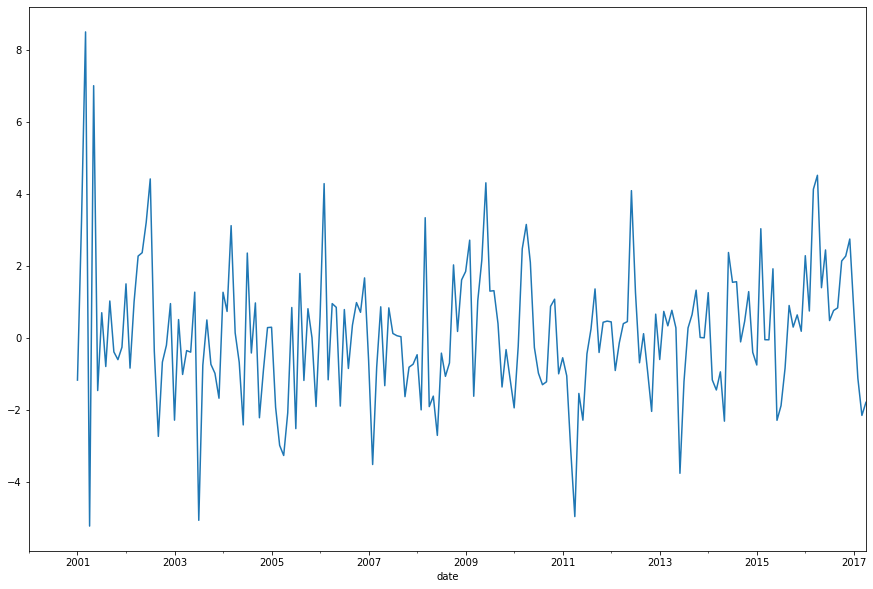

In [ ]:
df4['seasonal_diff'].plot(figsize=(15, 10))
plt.show()

Lets plot auto-correlation and partial auto-correlation for the differenced series

Auto-Correlation plot will help find MA order and partial-autocorrelation for AR order i.e the order of p,q for time series model

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

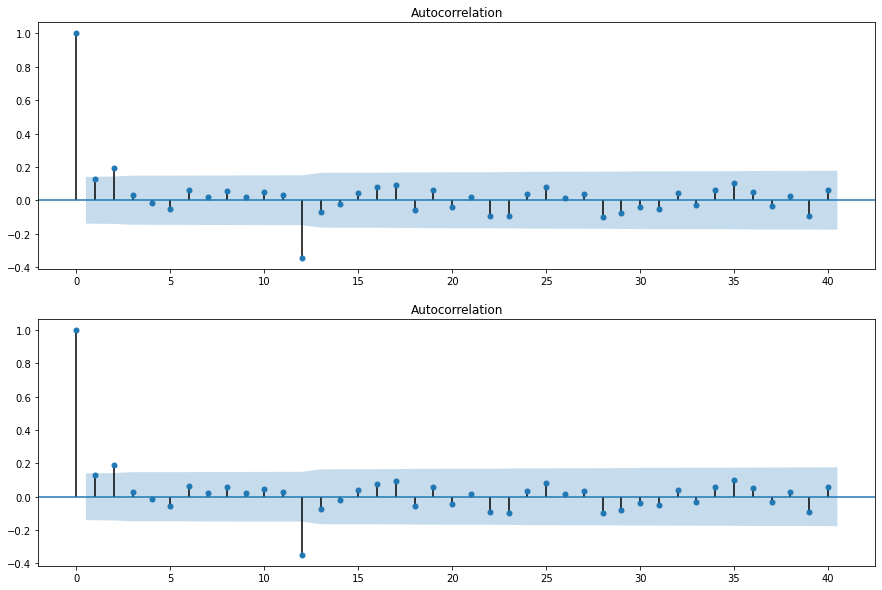

In [ ]:
fig=plt.figure(figsize=(15, 10))
ax1=fig.add_subplot(211)
fig=plot_acf(df4['seasonal_diff'].dropna(), lags=40, ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_acf(df4['seasonal_diff'].dropna(), lags=40, ax=ax2)


Although we observe 2 significant ACF values and 2 significant PACF values, it is not easy to determine the optimal orders of the ARIMA models this way. Hence, we will use the SARIMAX model, and use grid search over best parameters.

**Data Splitting**

I used temperature data from 2000-2015 to train the model and 2015-2017 for testing purpose


In [ ]:
train=df4["temp"][:"2015-01-01"].to_frame() #to convert series object to dataframe
test=df4["temp"]["2015-01-01":].to_frame()

train.shape,test.shape

((180, 1), (28, 1))

**SARIMAX Model Building**

SARIMAX takes arguments order=(p,d,q) & seasonal_order=(P,D,Q,s), so for this reason I have initialized parameters to grid search over the best parameters for SARIMAX.

p -> AR model lags

d -> differencing/intergration order

q -> MA model lags

In [ ]:
import itertools

p=d=q=range(0,2)

pdq=list(itertools.product(p,d,q)) #provides cartesian product of matrices
seasonal_pdq=[(x[0],x[1],x[2],12) for x in pdq]

This for loop will iterate over all combinations of initialized parameters, fit SARIMAX model with all combinations and parameters yeilding lowest AIC will be selected

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
l_aic=10000
for pdq_params in pdq:
  for seasonal_pdq_params in seasonal_pdq:
    try:
      model= SARIMAX(train,
                    order=pdq_params,
                    seasonal_order=seasonal_pdq_params
                    )
      result_aic= model.fit().aic

      if result_aic<l_aic: #To help find least AIC and its parameters
        l_aic=result_aic
        order_opt=pdq_params
        seasonal_order_opt=seasonal_pdq_params

      print("SARIMAX({}x{}12)-AIC:{}".format(pdq_params, seasonal_pdq_params, result_aic))
    except:
      continue

SARIMAX((0, 0, 0)x(0, 0, 0, 12)12)-AIC:1687.630981744702
SARIMAX((0, 0, 0)x(0, 0, 1, 12)12)-AIC:1489.7160150181435
SARIMAX((0, 0, 0)x(0, 1, 0, 12)12)-AIC:696.2651626864938
SARIMAX((0, 0, 0)x(0, 1, 1, 12)12)-AIC:655.0766026664901
SARIMAX((0, 0, 0)x(1, 0, 0, 12)12)-AIC:810.1801691773001
SARIMAX((0, 0, 0)x(1, 0, 1, 12)12)-AIC:769.4067323566967
SARIMAX((0, 0, 0)x(1, 1, 0, 12)12)-AIC:669.3318989761676
SARIMAX((0, 0, 0)x(1, 1, 1, 12)12)-AIC:656.7200684455877
SARIMAX((0, 0, 1)x(0, 0, 0, 12)12)-AIC:1468.5225332284435


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX((0, 0, 1)x(0, 0, 1, 12)12)-AIC:1303.9441534711555
SARIMAX((0, 0, 1)x(0, 1, 0, 12)12)-AIC:697.7252752068237
SARIMAX((0, 0, 1)x(0, 1, 1, 12)12)-AIC:655.5667782725478
SARIMAX((0, 0, 1)x(1, 0, 0, 12)12)-AIC:809.9588707194479
SARIMAX((0, 0, 1)x(1, 0, 1, 12)12)-AIC:767.9094964037877
SARIMAX((0, 0, 1)x(1, 1, 0, 12)12)-AIC:670.3612050973034
SARIMAX((0, 0, 1)x(1, 1, 1, 12)12)-AIC:657.4490661663565
SARIMAX((0, 1, 0)x(0, 0, 0, 12)12)-AIC:1043.0168109262079
SARIMAX((0, 1, 0)x(0, 0, 1, 12)12)-AIC:957.503887054251
SARIMAX((0, 1, 0)x(0, 1, 0, 12)12)-AIC:797.3612014175617
SARIMAX((0, 1, 0)x(0, 1, 1, 12)12)-AIC:747.5870908487307
SARIMAX((0, 1, 0)x(1, 0, 0, 12)12)-AIC:861.3723739468169
SARIMAX((0, 1, 0)x(1, 0, 1, 12)12)-AIC:816.9869305709645
SARIMAX((0, 1, 0)x(1, 1, 0, 12)12)-AIC:765.0007878545209
SARIMAX((0, 1, 0)x(1, 1, 1, 12)12)-AIC:747.5135794343289
SARIMAX((0, 1, 1)x(0, 0, 0, 12)12)-AIC:1013.5376527987032
SARIMAX((0, 1, 1)x(0, 0, 1, 12)12)-AIC:956.7912368424523
SARIMAX((0, 1, 1)x(0, 1, 0, 1

The following combinations will be used as our parameters for the SARIMAX model

In [ ]:
print("Least AIC: {}\nSARIMAX Order: {}\nSARIMAX Seasonal Order: {}".format(l_aic, order_opt, seasonal_order_opt))

Least AIC: 652.5658785025407
SARIMAX Order: (1, 0, 1)
SARIMAX Seasonal Order: (0, 1, 1, 12)


In [ ]:
model=SARIMAX(train,
             order=(1, 0, 1),
             seasonal_order=(0, 1, 1, 12)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                               temp   No. Observations:                  180
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -322.283
Date:                            Sat, 23 Oct 2021   AIC                            652.566
Time:                                    05:13:19   BIC                            665.062
Sample:                                01-31-2000   HQIC                           657.637
                                     - 12-31-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7363      0.211      3.494      0.000       0.323       1.149
ma.L1         -0.5983      0.232     -2.578      0.010      -1.053      -0.143
ma.S.L12      -0.8035      0.084     -9.621      0.000      -0.967      -0.640
sigma2         2.5211      0.219     11.510      0.000       2.092       2.950
===================================================================================
Ljung-Box (Q):                       51.16   Jarque-Bera (JB):                74.64
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                             0.96
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Residual plot: There is no obvious patterns observed.

Histogram + KDE plot: KDE curve is similar to the normal distribution

Normal Q-Q: Most of the data points lies around and on the red line

Correlogram (ACF plot) :correlations for lag greater than one is not significant

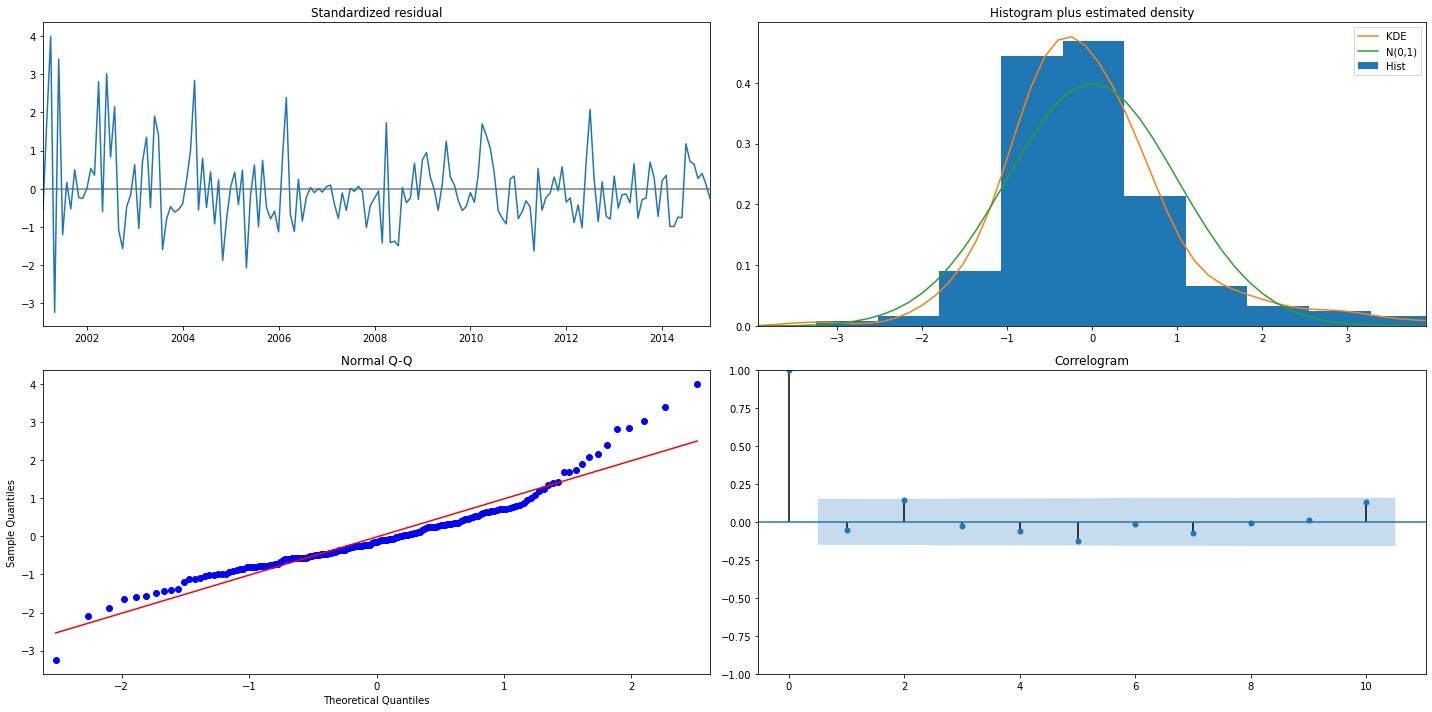

In [ ]:
model.plot_diagnostics(figsize=(20,10))
plt.tight_layout()
plt.show()

**Predict the test data**

In [ ]:
predict=model.get_prediction(start=len(train),
                             end=len(train)+len(test)-1)

Getting the upper and lower bounds of predicted values to help define confidence intervals

In [ ]:
bounds=predict.conf_int() #returns confidence intervals (range of values likely to include a population value) with default significance level 95%
bounds.head()

,lower temp,upper temp
2015-01-31,10.014869,16.240494
2015-02-28,13.866123,20.150732
2015-03-31,19.898274,26.214636
2015-04-30,26.170560,32.504071
2015-05-31,29.575831,35.918620


In [ ]:
lower_lim=bounds["lower temp"]
upper_lim=bounds["upper temp"]

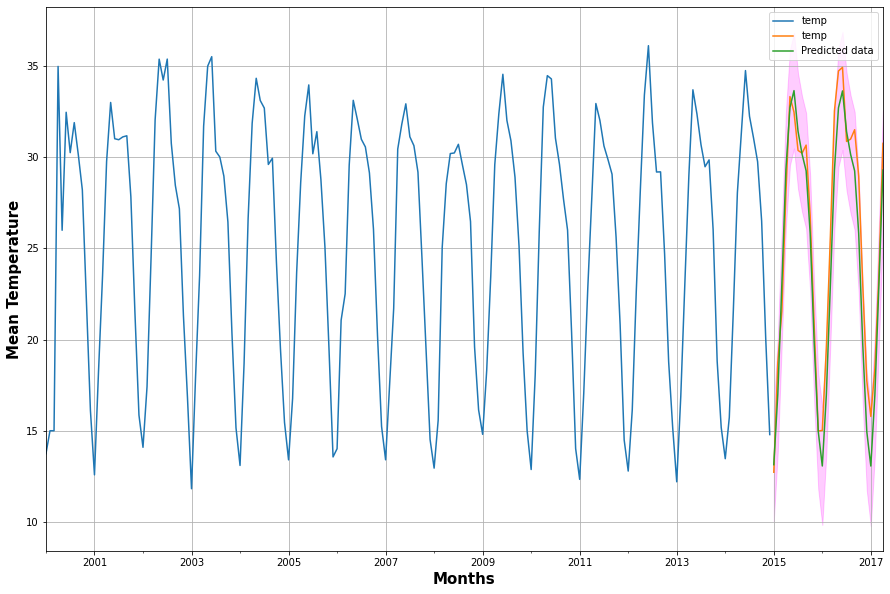

In [ ]:
predict_values=predict.predicted_mean
ax=train.plot(label="Training Data",figsize=(15, 10))
test.plot(label="Testing Data",ax=ax)
predict_values.plot(label="Predicted data",ax=ax)

ax.fill_between(bounds.index,lower_lim,upper_lim,color="magenta",alpha=0.2)
plt.xlabel("Months",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.grid(True)
plt.legend(loc="best")
plt.show()

Our Prediction is working well as of now and giving us good results on Test data

In [ ]:
from sklearn.metrics import mean_squared_error

rmse=mean_squared_error(test["temp"].values,predict_values,squared=False)
rmse

1.8357778493135697

RMSE is 1.8 which is pretty good



In [ ]:
test.tail()

,temp
date,
2016-12-31,17.733945
2017-01-31,15.776730
2017-02-28,18.414062
2017-03-31,23.553459
2017-04-30,30.775120


Now lets try to predict new data from March 2017 to December 2021

In [ ]:
dates_to_predict=pd.date_range(start="2017-04-30", end="2021-12-31", freq="M")
len(dates_to_predict)

57

In [ ]:
new_predict=model.get_prediction(start=len(df4),
                                 end=(len(df4)+len(dates_to_predict)))

In [ ]:
new_predict_values=new_predict.predicted_mean

In [ ]:
new_bounds=new_predict.conf_int()
new_lower_lim=new_bounds["lower temp"]
new_upper_lim=new_bounds["upper temp"]

**The new predicted Monthly average Temperature**

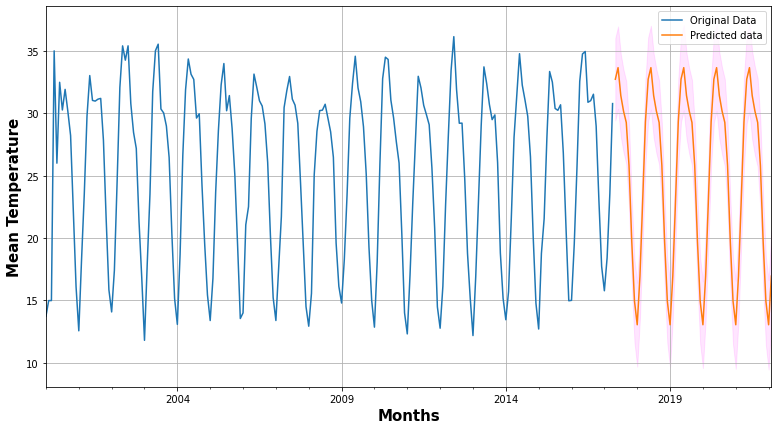

In [ ]:
ax=df4["temp"].plot(label="Original Data",figsize=(13,7))
new_predict_values.plot(label="Predicted data",ax=ax)
ax.fill_between(new_bounds.index,new_lower_lim,new_upper_lim,color="magenta",alpha=0.1)

plt.xlabel("Months",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.grid(True)
plt.legend(loc="best")
plt.show()


In [ ]:
df_estimate=new_predict_values.to_frame()
df_estimate.columns=['temp']
df_estimate.head()

,temp
2017-05-31,32.725314
2017-06-30,33.653292
2017-07-31,31.420929
2017-08-31,30.170653
2017-09-30,29.260631
